In [1]:
# IMPORTING ALL NECESSARY LIBRARIES

# packages for Exploratory Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
import os

# Data Preprocessing
from sklearn import preprocessing,metrics
from sklearn.preprocessing import LabelEncoder
from IPython.core.display import HTML
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.datasets import make_regression
from imblearn.over_sampling import SMOTE

# Model Evaluation
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score
import xgboost as xgb


# Model saving
import pickle
import joblib


In [2]:
df  = pd.read_csv('LoanData.csv',nrows=50000)

In [3]:
df.head(10)

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,PartyId,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2024-02-05,D8EBF360-104C-420F-BEC9-000924E6EFC7,3015853,2022-09-09 12:27:01,2022-09-09 15:27:01,11,0,88.0,{1AD71AF0-8240-4700-B602-ADA90177DD8C},False,2022-09-09 15:15:03,2022-09-09,2025-10-27,2022-10-07,2027-09-07,2025-10-27,12,6,4.0,1,27,NaN,1.0,EE,3189.0,3189.0,35.48,60,115.34,NaN,NaN,-1,3.0,-1.0,NaN,-1.0,UpTo5Years,NaN,NaN,-1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,0,0.00,0,0.00,0.00,7,True,NaN,184.32,2024-02-02,NaN,NaN,NaN,NaN,0.106489,0.664726,0.136812,0.160200,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024-02-02 13:28:17.490000000,6.0,D,NaN,NaN,NaN,NaN,NaN,Current,False,NaN,1-7,M,NaN,NaN,1000.0,628.09,1264.5300,NaN,NaN,2560.91,0.00,1.0,3402.0,1161.57,NaN,0.0,NaN,NaN,2024-02-26,3.0,23.0,2023-11-30,NaN,NaN,NaN
1,2024-02-05,C1A98DDA-5E20-429C-BBFF-0009A05354E0,3743447,2023-05-19 11:04:33,2023-05-19 14:04:33,0,0,0.0,{3A9CF70B-0BD2-4ECE-8997-AF7F00D0EC5A},False,2023-05-19 14:03:54,2023-05-19,2033-06-27,2023-06-05,2028-05-03,2033-06-27,23,4,4.0,4,35,NaN,1.0,FI,4146.0,4146.0,19.86,60,108.17,NaN,NaN,-1,5.0,-1.0,NaN,-1.0,UpTo5Years,NaN,NaN,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3100.0,0,0.00,0,0.00,0.00,3,True,NaN,230.75,2024-01-26,NaN,NaN,NaN,NaN,0.030048,0.760044,0.138239,0.039534,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2024-01-02 16:19:27.440000000,0.0,B,NaN,NaN,NaN,NaN,NaN,Current,True,NaN,1-7,M,NaN,3,NaN,272.34,493.8575,NaN,NaN,3873.66,0.00,1.0,518.0,525.21,NaN,0.0,NaN,NaN,2024-02-26,8.0,120.0,2023-07-20,NaN,NaN,NaN
2,2024-02-05,9B0B252E-45B9-4172-8E2D-0014A8F18117,4335414,2024-02-03 14:43:32,2024-02-03 16:43:32,0,0,0.0,{FBC12A4E-7A50-4906-8C57-AFA2010015C5},False,2024-02-03 16:41:51,2024-02-03,NaN,2024-02-23,2029-01-23,2029-01-23,17,6,4.0,1,23,NaN,0.0,EE,531.0,531.0,19.52,60,15.25,NaN,NaN,-1,5.0,-1.0,NaN,-1.0,UpTo5Years,NaN,NaN,-1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1700.0,0,0.00,0,0.00,0.00,23,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043995,0.714607,0.132462,0.061565,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,B,NaN,NaN,NaN,NaN,NaN,Current,False,NaN,NaN,M,NaN,NaN,1000.0,0.00,0.0000,NaN,NaN,531.00,

In [4]:
df.shape

(50000, 112)

In [5]:

# Set the display option to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the data types of each column
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
ReportAsOfEOD                              object
LoanId                                     object
LoanNumber                                  int64
ListedOnUTC                                object
BiddingStartedOn                           object
BidsPortfolioManager                        int64
BidsApi                                     int64
BidsManual                                float64
PartyId                                    object
NewCreditCustomer                            bool
LoanApplicationStartedDate                 object
LoanDate                                   object
ContractEndDate                            object
FirstPaymentDate                           object
MaturityDate_Original                      object
MaturityDate_Last                          object
ApplicationSignedHour                       int64
ApplicationSignedWeekday                    int64
VerificationType                          float64
LanguageCode           

In [6]:

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Calculating the percentage of missing values in each column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Display the result
print("Percentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
ReportAsOfEOD                               0.00
LoanId                                      0.00
LoanNumber                                  0.00
ListedOnUTC                                 0.00
BiddingStartedOn                            0.00
BidsPortfolioManager                        0.00
BidsApi                                     0.00
BidsManual                                  0.00
PartyId                                     0.00
NewCreditCustomer                           0.00
LoanApplicationStartedDate                  0.00
LoanDate                                    0.00
ContractEndDate                            35.14
FirstPaymentDate                            0.00
MaturityDate_Original                       0.00
MaturityDate_Last                           0.00
ApplicationSignedHour                       0.00
ApplicationSignedWeekday                    0.00
VerificationType                            0.10
LanguageCode            

In [7]:
missing_columns = df.columns[100*(df.isnull().sum()/len(df.index)) > 60]
print(missing_columns)

Index(['DateOfBirth', 'County', 'City', 'EmploymentPosition', 'EL_V0',
       'Rating_V0', 'EL_V1', 'Rating_V1', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'NextPaymentNr',
       'NrOfScheduledPayments', 'ReScheduledOn'],
      dtype='object')


In [8]:
miss_col=['ContractEndDate', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost',
       'ActiveLateLastPaymentCategory']

In [9]:
cols_del = ['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth',
       'BiddingStartedOn','UserName','NextPaymentNr',
       'NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory']


In [10]:
df = df.drop(miss_col, axis=1)
print(df.shape)

(50000, 77)


In [11]:
# Set the display option to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the data types of each column
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
ReportAsOfEOD                              object
LoanId                                     object
LoanNumber                                  int64
ListedOnUTC                                object
BiddingStartedOn                           object
BidsPortfolioManager                        int64
BidsApi                                     int64
BidsManual                                float64
PartyId                                    object
NewCreditCustomer                            bool
LoanApplicationStartedDate                 object
LoanDate                                   object
FirstPaymentDate                           object
MaturityDate_Original                      object
MaturityDate_Last                          object
ApplicationSignedHour                       int64
ApplicationSignedWeekday                    int64
VerificationType                          float64
LanguageCode                                int64
Age                    

In [12]:
df['Status'].value_counts()

Status
Repaid     33688
Late       13202
Current     3110
Name: count, dtype: int64

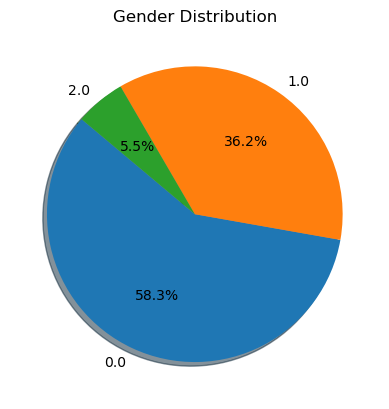

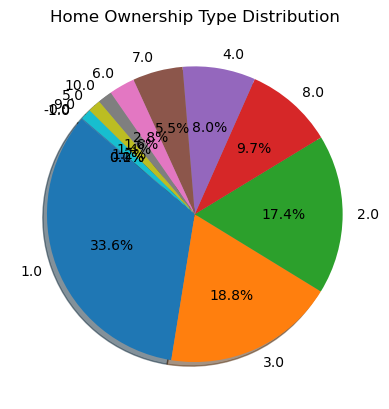

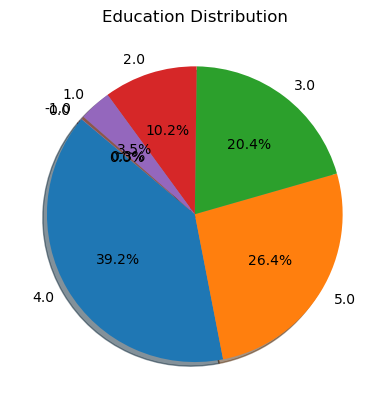

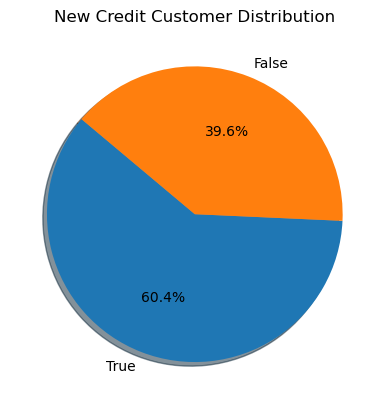

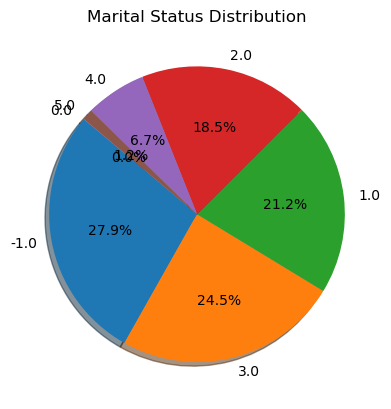

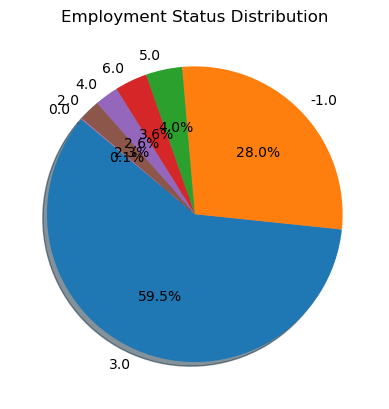

In [13]:
# Count the occurrences of some columms
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Gender Distribution')
plt.show()

# Count the occurrences of each HomeOwnershipType
home_ownership_counts = df['HomeOwnershipType'].value_counts()

# Create a pie chart
plt.pie(home_ownership_counts, labels=home_ownership_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Home Ownership Type Distribution')
plt.show()

# Count the occurrences of each Education level
education_counts = df['Education'].value_counts()

# Create a pie chart
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Education Distribution')
plt.show()


# Count the occurrences of NewCreditCustomer
new_credit_counts = df['NewCreditCustomer'].value_counts()

# Create a pie chart for NewCreditCustomer
plt.pie(new_credit_counts, labels=new_credit_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('New Credit Customer Distribution')
plt.show()

# Count the occurrences of MaritalStatus
marital_counts = df['MaritalStatus'].value_counts()

# Create a pie chart for MaritalStatus
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Marital Status Distribution')
plt.show()

# Count the occurrences of EmploymentStatus
employment_counts = df['EmploymentStatus'].value_counts()

# Create a pie chart for EmploymentStatus
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Employment Status Distribution')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '-1.0'),
  Text(1, 0, '0.0'),
  Text(2, 0, '1.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '3.0'),
  Text(5, 0, '4.0'),
  Text(6, 0, '5.0')])

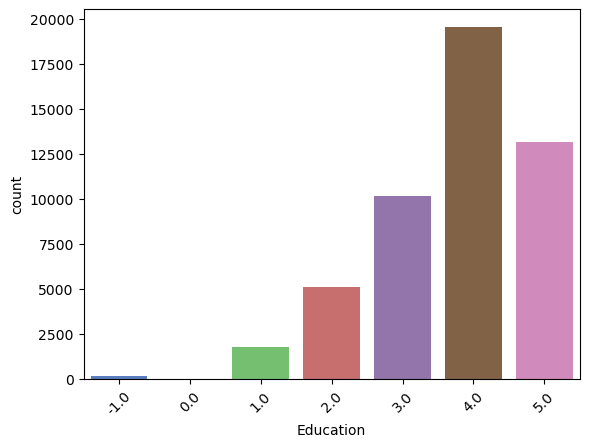

In [14]:
sns.countplot(x = df['Education'],palette = "muted");
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '-1.0'),
  Text(1, 0, '0.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0')])

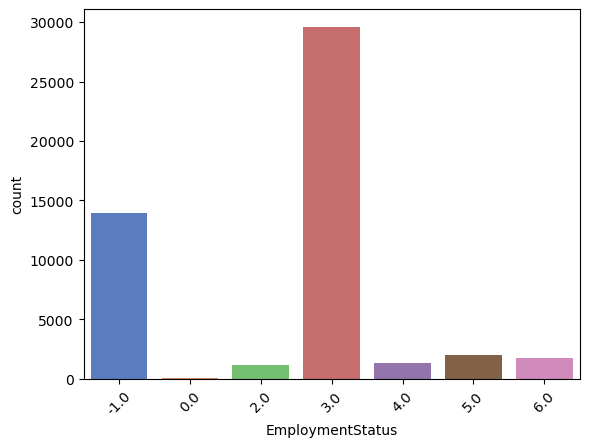

In [15]:
sns.countplot(x = df['EmploymentStatus'],palette = "muted");
plt.xticks(rotation = 45)

(array([0, 1, 2]), [Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0')])

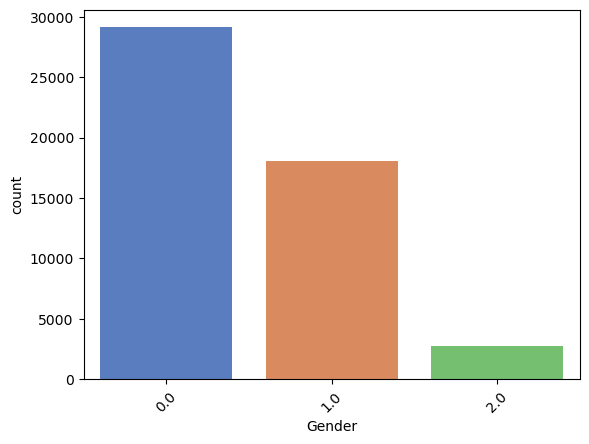

In [16]:
sns.countplot(x = df['Gender'],palette = "muted");
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '-1.0'),
  Text(1, 0, '0.0'),
  Text(2, 0, '1.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '3.0'),
  Text(5, 0, '4.0'),
  Text(6, 0, '5.0')])

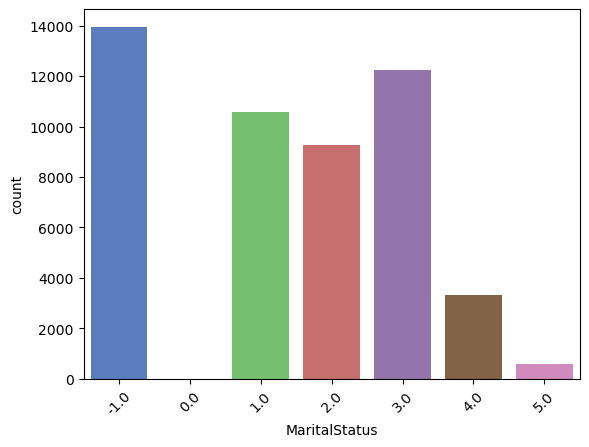

In [17]:
sns.countplot(x = df['MaritalStatus'],palette = "muted");
plt.xticks(rotation = 45)

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

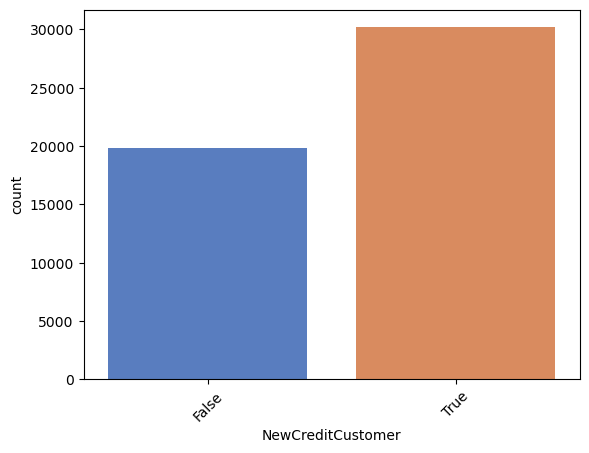

In [18]:
sns.countplot(x = df['NewCreditCustomer'],palette = "muted");
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '-1.0'),
  Text(1, 0, '0.0'),
  Text(2, 0, '1.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '3.0'),
  Text(5, 0, '4.0'),
  Text(6, 0, '5.0')])

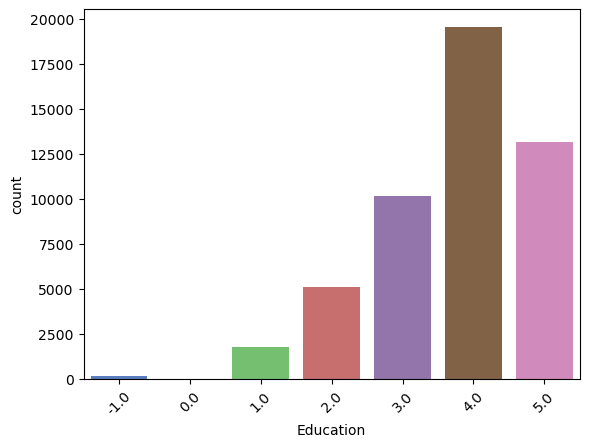

In [19]:
sns.countplot(x = df['Education'],palette = "muted");
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '-1.0'),
  Text(1, 0, '0.0'),
  Text(2, 0, '1.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '3.0'),
  Text(5, 0, '4.0'),
  Text(6, 0, '5.0'),
  Text(7, 0, '6.0'),
  Text(8, 0, '7.0'),
  Text(9, 0, '8.0'),
  Text(10, 0, '9.0'),
  Text(11, 0, '10.0')])

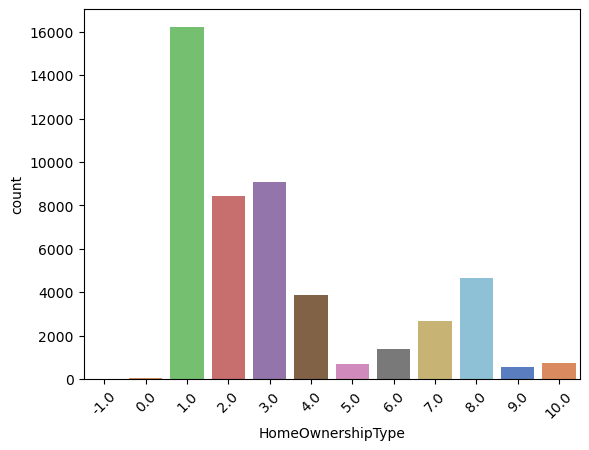

In [20]:
sns.countplot(x = df['HomeOwnershipType'],palette = "muted");
plt.xticks(rotation = 45)

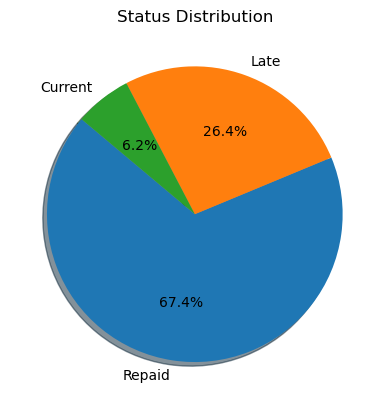

In [21]:
# Count the occurrences of Status
status_counts = df['Status'].value_counts()

# Create a pie chart for Status
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Status Distribution')
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'Current'), Text(1, 0, 'Repaid'), Text(2, 0, 'Late')])

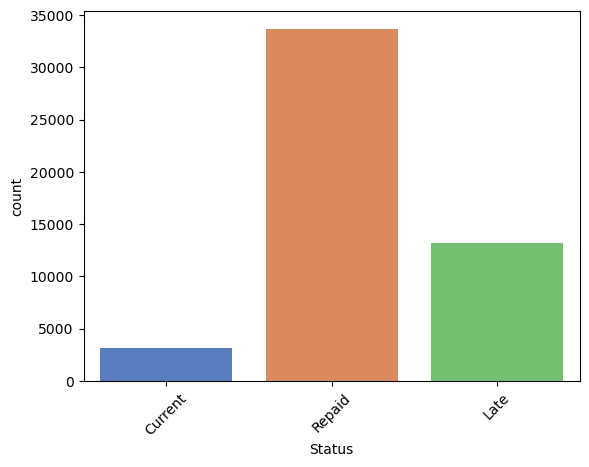

In [22]:
sns.countplot(x = df['Status'],palette = "muted");
plt.xticks(rotation = 45)

# Target Variable Definition

In [23]:
# filtering out Current Status records
df = df[df['Status'] != 'Current']

In [24]:
df["Default"] = df['Status'].apply(lambda x: 0 if x=='Repaid' else 1)

In [25]:
df['Default'].value_counts()

Default
0    33688
1    13202
Name: count, dtype: int64

In [26]:
df = df.drop(['Status'],axis=1)

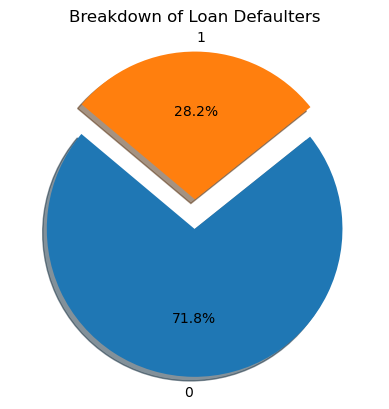

In [27]:
# Data Analysis
status_counts = df['Default'].value_counts()

plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', shadow=True, explode=[0.1, 0.1], startangle=140)
plt.title('Breakdown of Loan Defaulters')
plt.show()

**MultiVariate** **Analysis**

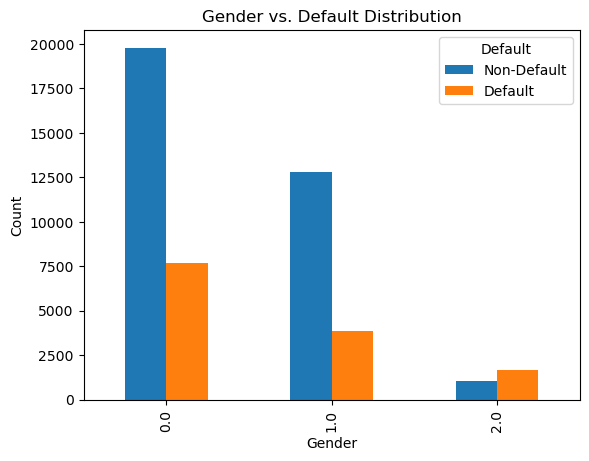

In [28]:

# Count the occurrences of Default based on Gender
gender_default_counts = df.groupby(['Gender', 'Default']).size().unstack()

# Create a bar graph for Gender vs. Default without stacking
gender_default_counts.plot(kind='bar')
plt.title('Gender vs. Default Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Non-Default', 'Default'])
plt.show()

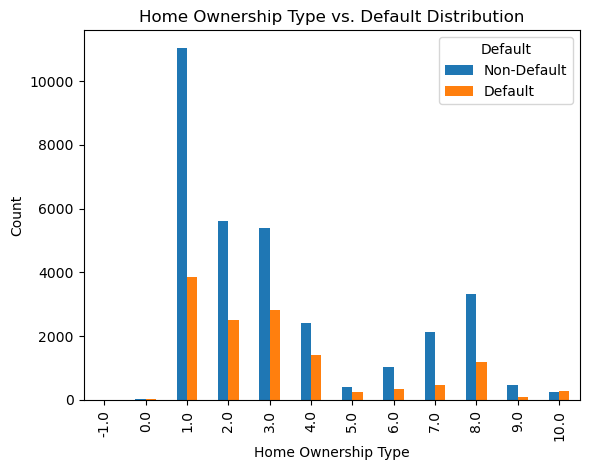

In [29]:
# Count the occurrences of Default based on HomeOwnershipType
home_default_counts = df.groupby(['HomeOwnershipType', 'Default']).size().unstack()

# Create a bar graph for HomeOwnershipType vs. Default without stacking
home_default_counts.plot(kind='bar', stacked=False)
plt.title('Home Ownership Type vs. Default Distribution')
plt.xlabel('Home Ownership Type')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Non-Default', 'Default'])
plt.show()

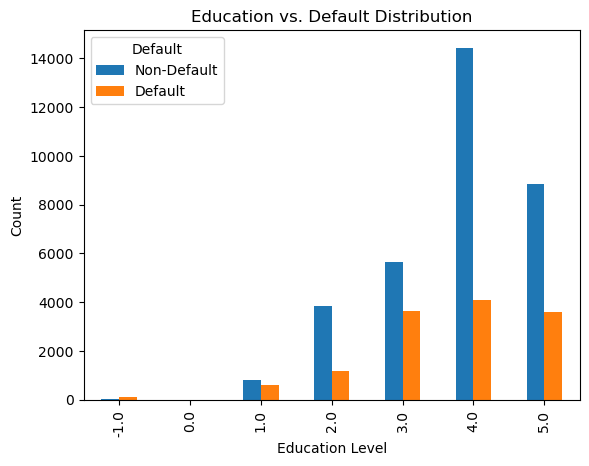

In [30]:
# Count the occurrences of Default based on Education
education_default_counts = df.groupby(['Education', 'Default']).size().unstack()

# Create a bar graph for Education vs. Default without stacking
education_default_counts.plot(kind='bar', stacked=False)
plt.title('Education vs. Default Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Non-Default', 'Default'])
plt.show()

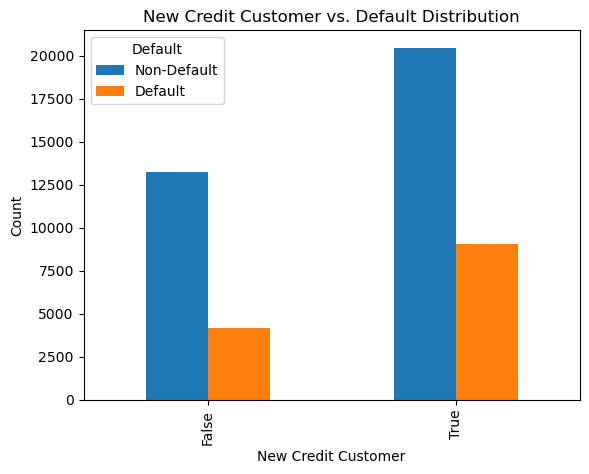

In [31]:
# Count the occurrences of Default based on NewCreditCustomer
new_credit_default_counts = df.groupby(['NewCreditCustomer', 'Default']).size().unstack()

# Create a bar graph for NewCreditCustomer vs. Default without stacking
new_credit_default_counts.plot(kind='bar', stacked=False)
plt.title('New Credit Customer vs. Default Distribution')
plt.xlabel('New Credit Customer')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Non-Default', 'Default'])
plt.show()

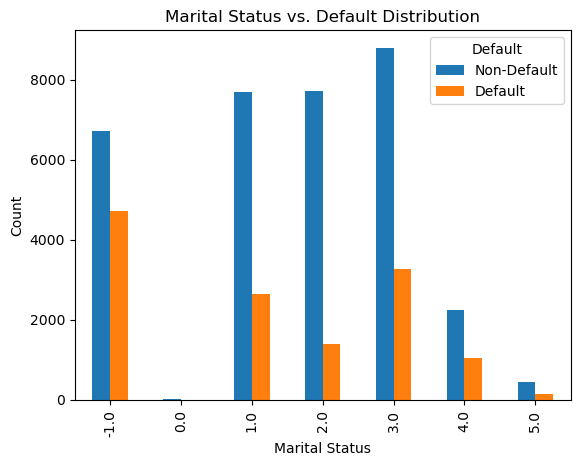

In [32]:
# Count the occurrences of Default based on MaritalStatus
marital_default_counts = df.groupby(['MaritalStatus', 'Default']).size().unstack()

# Create a bar graph for MaritalStatus vs. Default without stacking
marital_default_counts.plot(kind='bar', stacked=False)
plt.title('Marital Status vs. Default Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Non-Default', 'Default'])
plt.show()

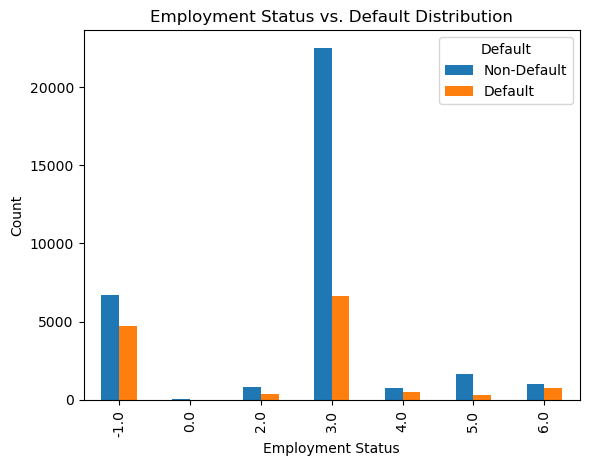

In [33]:
# Count the occurrences of Default based on EmploymentStatus
employment_default_counts = df.groupby(['EmploymentStatus', 'Default']).size().unstack()

# Create a bar graph for EmploymentStatus vs. Default without stacking
employment_default_counts.plot(kind='bar', stacked=False)
plt.title('Employment Status vs. Default Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Default', labels=['Non-Default', 'Default'])
plt.show()

# Defining Training Features

In [34]:

# Define the features and target variable
features_to_keep = ['Age', 'LoanDuration', 'NewCreditCustomer', 'VerificationType', 'Gender',
                     'Interest', 'UseOfLoan', 'Amount', 'AppliedAmount','LanguageCode','Education','EmploymentDurationCurrentEmployer','Rating', 'MaritalStatus',
                    'EmploymentStatus', 'OccupationArea', 'HomeOwnershipType','CreditScoreEsMicroL','ExistingLiabilities','DebtToIncome','IncomeTotal',
                    'Restructured','NoOfPreviousLoansBeforeLoan','ModelVersion',]

target_variable = 'Default'

# Select the features and target variable
final_df = df[features_to_keep + [target_variable]]



# Reset the index
final_df = final_df.reset_index(drop=True)

# Print the current shape of the dataset
print("Current shape of df:", final_df.shape)


Current shape of df: (46890, 25)


In [35]:
final_df.shape

(46890, 25)

In [36]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the data types of each column
print("Data types of each column:")
print(final_df.dtypes)

Data types of each column:
Age                                    int64
LoanDuration                           int64
NewCreditCustomer                       bool
VerificationType                     float64
Gender                               float64
Interest                             float64
UseOfLoan                              int64
Amount                               float64
AppliedAmount                        float64
LanguageCode                           int64
Education                            float64
EmploymentDurationCurrentEmployer     object
Rating                                object
MaritalStatus                        float64
EmploymentStatus                     float64
OccupationArea                       float64
HomeOwnershipType                    float64
CreditScoreEsMicroL                   object
ExistingLiabilities                    int64
DebtToIncome                         float64
IncomeTotal                          float64
Restructured                

# Initializing Label Encoder to Categorical Features

In [37]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns to integers using label encoding
final_df['EmploymentDurationCurrentEmployer'] = label_encoder.fit_transform(final_df['EmploymentDurationCurrentEmployer'])
final_df['Rating'] = label_encoder.fit_transform(final_df['Rating'])
final_df['NewCreditCustomer'] = label_encoder.fit_transform(final_df['NewCreditCustomer'])
final_df['Restructured'] = label_encoder.fit_transform(final_df['Restructured'])
final_df['CreditScoreEsMicroL'] = label_encoder.fit_transform(final_df['CreditScoreEsMicroL'])

In [38]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the data types of each column
print("Data types of each column:")
print(final_df.dtypes)

Data types of each column:
Age                                    int64
LoanDuration                           int64
NewCreditCustomer                      int64
VerificationType                     float64
Gender                               float64
Interest                             float64
UseOfLoan                              int64
Amount                               float64
AppliedAmount                        float64
LanguageCode                           int64
Education                            float64
EmploymentDurationCurrentEmployer      int32
Rating                                 int32
MaritalStatus                        float64
EmploymentStatus                     float64
OccupationArea                       float64
HomeOwnershipType                    float64
CreditScoreEsMicroL                    int32
ExistingLiabilities                    int64
DebtToIncome                         float64
IncomeTotal                          float64
Restructured                

# Dealing with missing values

In [39]:
# Filling Missing Values with Mean
final_df.fillna(final_df.mean(), inplace=True)

# Displaying DataFrame Tail and Shape
from IPython.display import HTML
HTML(final_df.tail().to_html())
print("Current shape of dataset:", final_df.shape)

Current shape of dataset: (46890, 25)


In [40]:
# Training , Test Split

X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:, :-1], final_df.iloc[:, -1], test_size=0.2, random_state=42)

# Using SMOTE to balance the dataset

In [41]:
sm = SMOTE(random_state=42, k_neighbors=5)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Select features and target variable
X = final_df[features_to_keep]
y = final_df[target_variable]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=24, n_targets=1, random_state=42)

# Create a Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create an RFE selector
selector = RFE(model, n_features_to_select=24)

# Fit the RFE selector to the data
selector = selector.fit(X, y)

# Get the selected features
selected_features = selector.support_

# Get the ranking of each feature
feature_ranking = selector.ranking_

# Print the selected features and their rankings
print("Selected Features:", selected_features)
print("Feature Rankings:", feature_ranking)



#features_to_keep = ['Age', 'LoanDuration', 'NewCreditCustomer', 'VerificationType', 'Gender',
                   #  'Interest', 'UseOfLoan', 'Amount', 'AppliedAmount','LanguageCode','Education','EmploymentDurationCurrentEmployer','Rating', 'MaritalStatus',
                    #'EmploymentStatus', 'OccupationArea', 'HomeOwnershipType','CreditScoreEsMicroL','ExistingLiabilities','DebtToIncome','IncomeTotal',
                    #'Restructured','NoOfPreviousLoansBeforeLoan','ModelVersion',]


Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
Feature Rankings: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


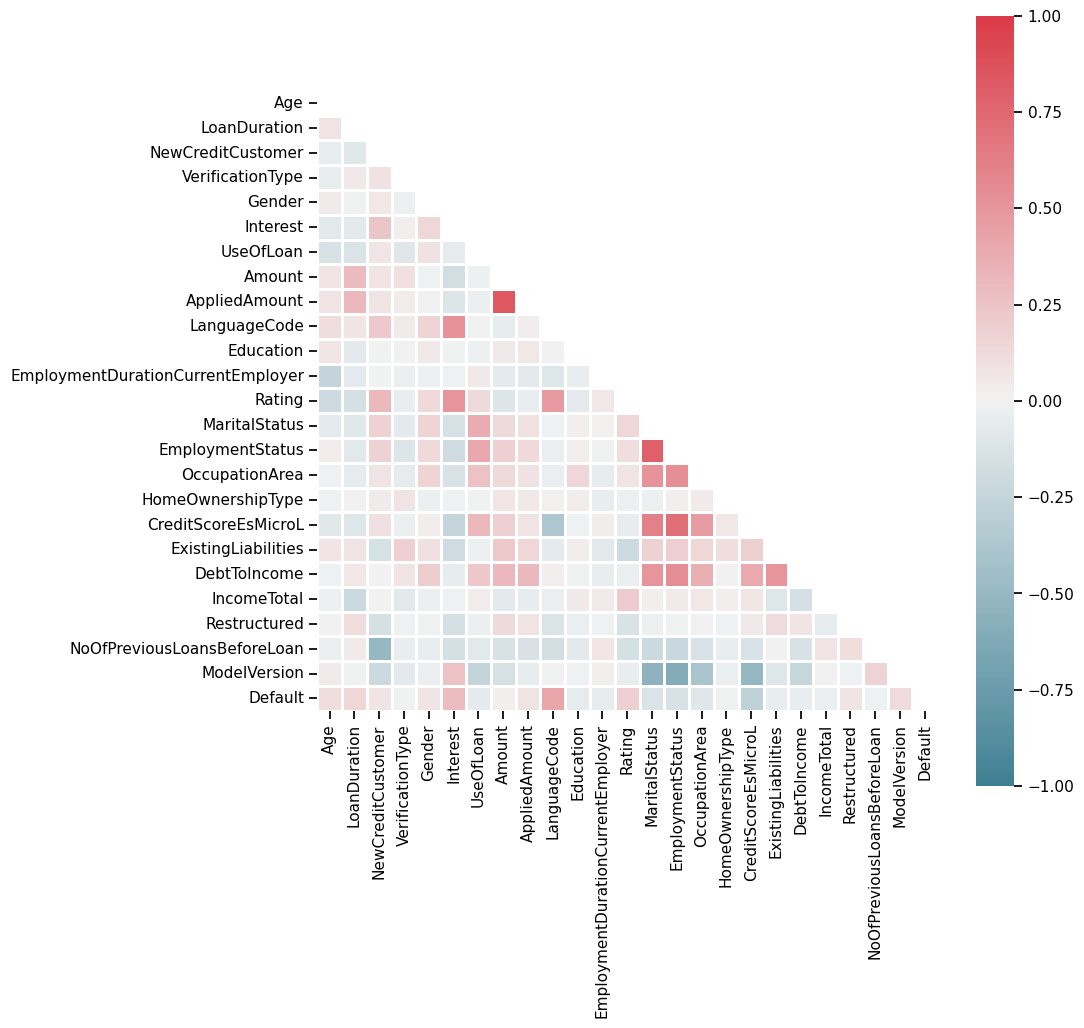

In [44]:
dataViz = final_df
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,10))
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)
plt.show()


In [45]:
final_df.corr()

,Age,LoanDuration,NewCreditCustomer,VerificationType,Gender,Interest,UseOfLoan,Amount,AppliedAmount,LanguageCode,Education,EmploymentDurationCurrentEmployer,Rating,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,CreditScoreEsMicroL,ExistingLiabilities,DebtToIncome,IncomeTotal,Restructured,NoOfPreviousLoansBeforeLoan,ModelVersion,Default
Age,1.000000,0.079656,-0.045190,-0.044542,0.042489,-0.078880,-0.136155,0.073959,0.084367,0.105418,0.063893,-0.254843,-0.200424,-0.065834,0.037058,-0.009041,-0.011599,-0.089369,0.077162,-0.010670,-0.020749,0.004448,-0.025894,0.042427,0.111076
LoanDuration,0.079656,1.000000,-0.087525,0.052849,-0.005627,-0.083484,-0.119723,0.289283,0.311655,0.077592,-0.073389,-0.063129,-0.155693,-0.089929,-0.080513,-0.059255,0.000289,-0.104019,0.085933,0.058040,-0.208637,0.110025,0.045146,-0.000248,0.151239
NewCreditCustomer,-0.045190,-0.087525,1.000000,0.091371,0.061626,0.249632,0.067570,0.071329,0.079119,0.223637,-0.003907,-0.007142,0.318692,0.172064,0.172744,0.084035,0.045522,0.100048,-0.142285,0.007646,0.006676,-0.148441,-0.504018,-0.209462,0.073332
VerificationType,-0.044542,0.052849,0.091371,1.000000,-0.021361,0.015925,-0.098418,0.095974,0.032509,0.042727,0.006736,-0.023896,-0.040233,-0.073978,-0.111655,-0.057345,0.083433,-0.024658,0.179762,0.076571,-0.081483,-0.009856,-0.041548,-0.075165,-0.005183
Gender,0.042489,-0.005627,0.061626,-0.021361,1.000000,0.150895,0.090862,-0.015531,0.003710,0.160835,0.052099,-0.021789,0.136922,0.157789,0.139255,0.156708,-0.025334,0.025159,0.094171,0.202087,-0.027491,-0.001650,-0.041395,-0.032681,0.077078
Interest,-0.078880,-0.083484,0.249632,0.015925,0.150895,1.000000,-0.062012,-0.178341,-0.113784,0.519650,-0.000176,-0.007864,0.502290,-0.145319,-0.192659,-0.129185,-0.009123,-0.243961,-0.190505,-0.048056,-0.008308,-0.163013,-0.162160,0.263942,0.285749
UseOfLoan,-0.136155,-0.119723,0.067570,-0.098418,0.090862,-0.062012,1.000000,-0.016168,-0.023767,-0.007371,-0.017697,0.048987,0.128232,0.379507,0.401886,0.262685,-0.005962,0.312681,-0.015944,0.229001,0.032945,-0.028899,-0.083153,-0.250837,-0.069027
Amount,0.073959,0.289283,0.071329,0.095974,-0.015531,-0.178341,-0.016168,1.000000,0.843066,-0.047441,0.050265,-0.069043,-0.112846,0.125942,0.186214,0.125319,0.064323,0.188583,0.222548,0.311571,-0.073942,0.131550,-0.133814,-0.146475,0.021578
AppliedAmount,0.084367,0.311655,0.079119,0.032509,0.003710,-0.113784,-0.023767,0.843066,1.000000,0.028714,0.058902,-0.071461,-0.045406,0.086539,0.137239,0.088149,0.053284,0.084202,0.151157,0.307071,-0.049201,0.082945,-0.138248,-0.051772,0.080214
LanguageCode,0.105418,0.077592,0.223637,0.042727,0.160835,0.519650,-0.007371,-0.047441,0.028714,1.000000,0.000989,-0.104263,0.482405,-0.008992,-0.038435,-0.034789,0.007967,-0.376196,-0.067835,0.019873,-0.035809,-0.117556,-0.179682,-0.000132,0.412509


In [46]:
#Random Forest

# Initialize Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8627931136835857
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      6792
           1       0.85      0.87      0.86      6684

    accuracy                           0.86     13476
   macro avg       0.86      0.86      0.86     13476
weighted avg       0.86      0.86      0.86     13476

Confusion Matrix:
[[5798  994]
 [ 855 5829]]


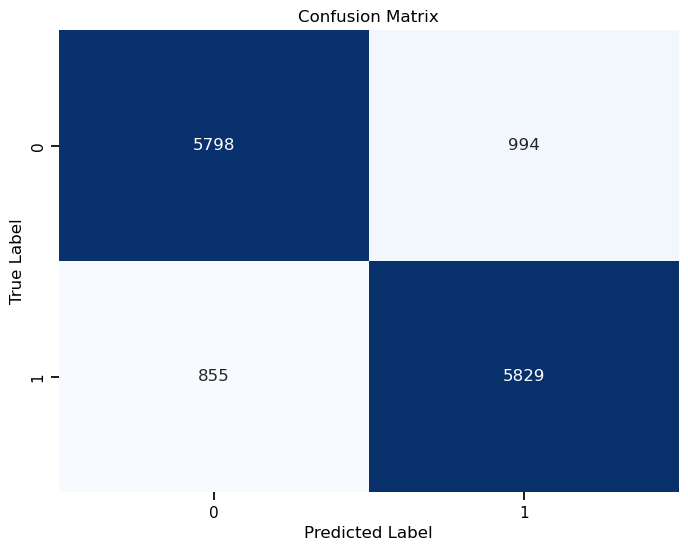

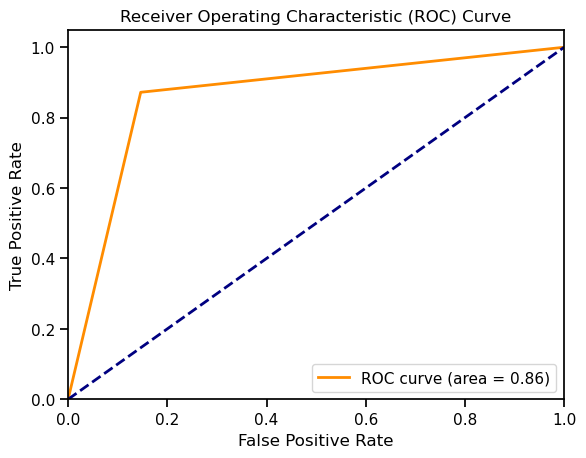

In [47]:
# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Youdnes Results Interpretation
Here's a general interpretation guide:

If Youden's Index is close to 0.5 or above, it indicates a good overall performance of the classification test.
If Youden's Index is closer to 0 or negative, it suggests that the test may not be as effective or may have an inverse relationship between sensitivity and specificity.

In [48]:
# informedness metric calculation

# Assuming conf_matrix is the confusion matrix
TP = conf_matrix[1, 1]  # True Positives
FP = conf_matrix[0, 1]  # False Positives
TN = conf_matrix[0, 0]  # True Negatives
FN = conf_matrix[1, 0]  # False Negatives

# Calculate Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate Informedness (Youden's J statistic)
informedness = sensitivity + specificity - 1
print("Informedness:", informedness)


Informedness: 0.7257339398130234


In [49]:
from sklearn.metrics import matthews_corrcoef

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)


MCC: 0.7257683843801707


In [50]:
#cohen's Kappa
from sklearn.metrics import cohen_kappa_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)

print("Cohen's Kappa:", kappa)


Cohen's Kappa: 0.7256139677641569


In [ ]:
# MCC interpretation
# MCC = +1: Perfect prediction.
 # MCC = 0: Random prediction, equivalent to a classifier that predicts classes randomly or makes predictions that are as good as random guessing.
# MCC < 0: Indicates total disagreement between prediction and observation, suggesting that the model is performing worse than random guessing.
 # MCC between 0 and +1: The closer the MCC is to +1, the better the classifier's performance, with values closer to 0 indicating weaker performance.

In [51]:
# Feature Importance

feature_importance = model.feature_importances_

# Get the column names of the features
feature_names = X_train.columns

# Create a DataFrame to store feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance (Descending Order):")
print(feature_importance_df)


Feature Importance (Descending Order):
                              Feature  Importance
9                        LanguageCode    0.118652
17                CreditScoreEsMicroL    0.101985
5                            Interest    0.077365
20                        IncomeTotal    0.072636
10                          Education    0.062586
0                                 Age    0.050994
1                        LoanDuration    0.044451
7                              Amount    0.038905
8                       AppliedAmount    0.038184
16                  HomeOwnershipType    0.036863
3                    VerificationType    0.034534
19                       DebtToIncome    0.033738
18                ExistingLiabilities    0.030135
4                              Gender    0.029795
13                      MaritalStatus    0.029484
23                       ModelVersion    0.028326
22        NoOfPreviousLoansBeforeLoan    0.027484
12                             Rating    0.027386
15         

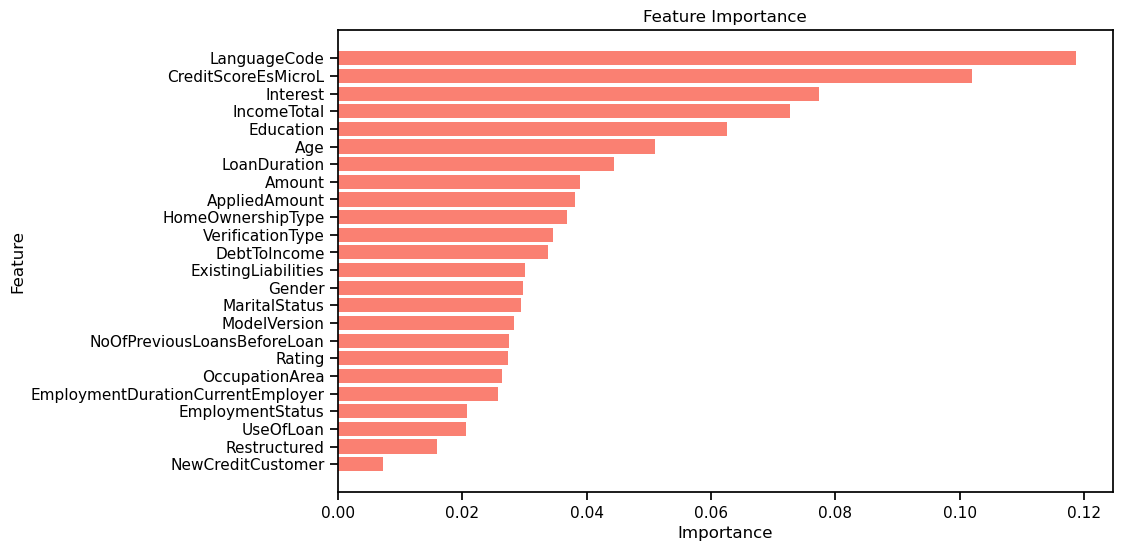

In [52]:

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='salmon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()


In [53]:
# XGBoost

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a model
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      6792
           1       0.86      0.85      0.85      6684

    accuracy                           0.85     13476
   macro avg       0.85      0.85      0.85     13476
weighted avg       0.85      0.85      0.85     13476



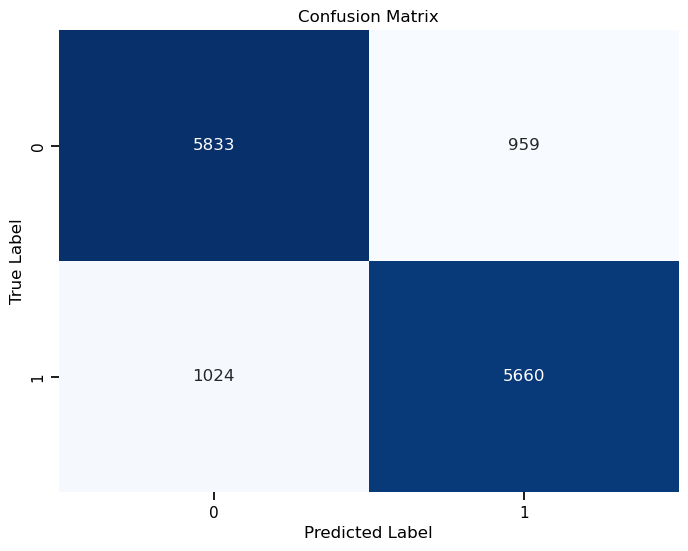

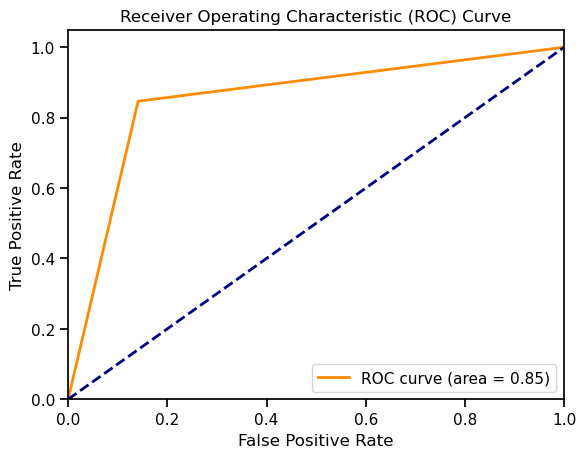

In [54]:
# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [55]:
# calculating Youdens Index

# Calculate True Positives, False Positives, True Negatives, and False Negatives
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Calculate Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate Youden's Index
youden_index = sensitivity + specificity - 1
print("Youden's Index:", youden_index)


Youden's Index: 0.7056028002106185


In [56]:
# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)


MCC: 0.7056902052215347


In [58]:
from sklearn.metrics import cohen_kappa_score

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)

print("Cohen's Kappa:", kappa)


Cohen's Kappa: 0.7056573592698524


In [59]:
# Get feature importances from the trained model
feature_importance = xgb_classifier.feature_importances_

# Get the column names of the features
feature_names = X_train.columns

# Create a DataFrame to store feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance (Descending Order):")
print(feature_importance_df)


Feature Importance (Descending Order):
                              Feature  Importance
9                        LanguageCode    0.281679
17                CreditScoreEsMicroL    0.152954
3                    VerificationType    0.075686
4                              Gender    0.069761
23                       ModelVersion    0.065180
1                        LoanDuration    0.059255
10                          Education    0.058892
21                       Restructured    0.034172
16                  HomeOwnershipType    0.032608
22        NoOfPreviousLoansBeforeLoan    0.022889
6                           UseOfLoan    0.020466
11  EmploymentDurationCurrentEmployer    0.015608
8                       AppliedAmount    0.012968
20                        IncomeTotal    0.011887
13                      MaritalStatus    0.011638
12                             Rating    0.010901
5                            Interest    0.009850
14                   EmploymentStatus    0.009137
18         

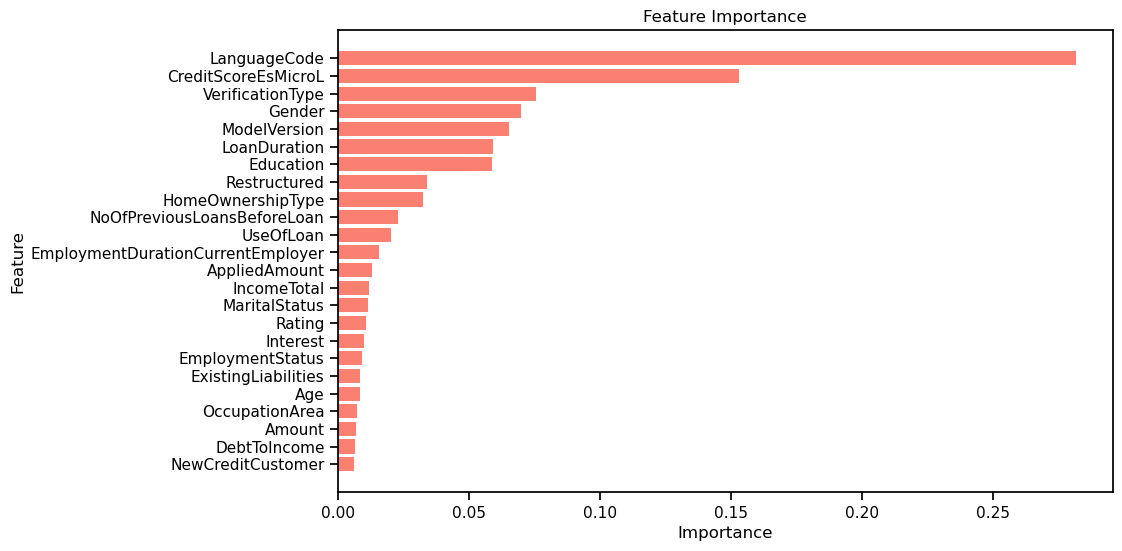

In [60]:

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='salmon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()


In [61]:
# lightgbm

# Select features and target variable
X = final_df[features_to_keep]
y = final_df[target_variable]

# Train a model
lgbm_classifier = LGBMClassifier(random_state=42)
lgbm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = lgbm_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 27004, number of negative: 26896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.244221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3807
[LightGBM] [Info] Number of data points in the train set: 53900, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501002 -> initscore=0.004007
[LightGBM] [Info] Start training from score 0.004007
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6792
           1       0.85      0.85      0.85      6684

    accuracy                           0.85     13476
   macro avg       0.85      0.85      0.85     13476
weighted avg       0.85      0.85      0.85     13476



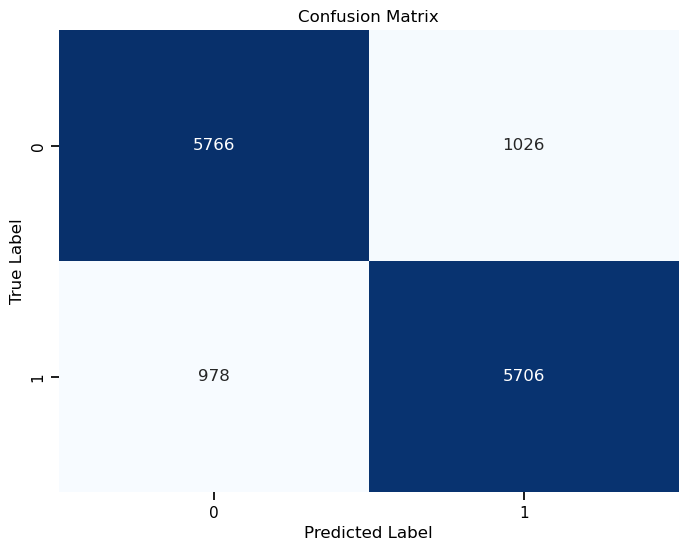

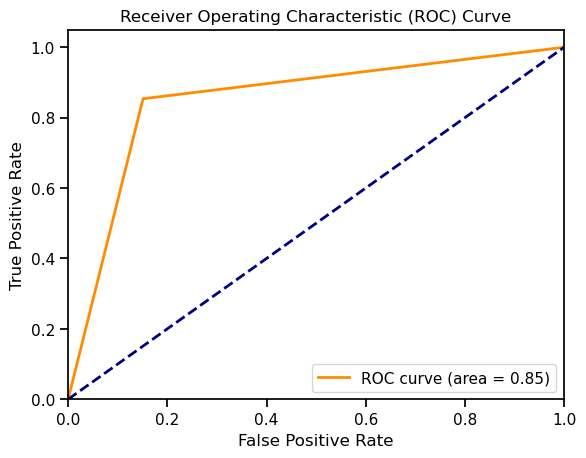

In [62]:
# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [63]:
# calculating Youdens Index aka Informedness

# Calculate True Positives, False Positives, True Negatives, and False Negatives
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Calculate Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate Youden's Index
youden_index = sensitivity + specificity - 1
print("Youden's Index:", youden_index)


Youden's Index: 0.7026203602083347


In [64]:
# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)


MCC: 0.7025980743974324


In [65]:
# Predict on the test set
y_pred = lgbm_classifier.predict(X_test)

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)

print("Cohen's Kappa:", kappa)


Cohen's Kappa: 0.7025802461304238


In [66]:
# Get feature importances from the trained model
feature_importance = lgbm_classifier.feature_importances_

# Get the column names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance (Descending Order):")
print(feature_importance_df)


Feature Importance (Descending Order):
                              Feature  Importance
10                          Education         251
16                  HomeOwnershipType         247
20                        IncomeTotal         233
0                                 Age         227
5                            Interest         211
22        NoOfPreviousLoansBeforeLoan         174
23                       ModelVersion         157
1                        LoanDuration         147
9                        LanguageCode         124
3                    VerificationType         123
18                ExistingLiabilities         112
8                       AppliedAmount         111
21                       Restructured         107
15                     OccupationArea         102
7                              Amount          93
13                      MaritalStatus          92
4                              Gender          90
19                       DebtToIncome          87
11  Employm

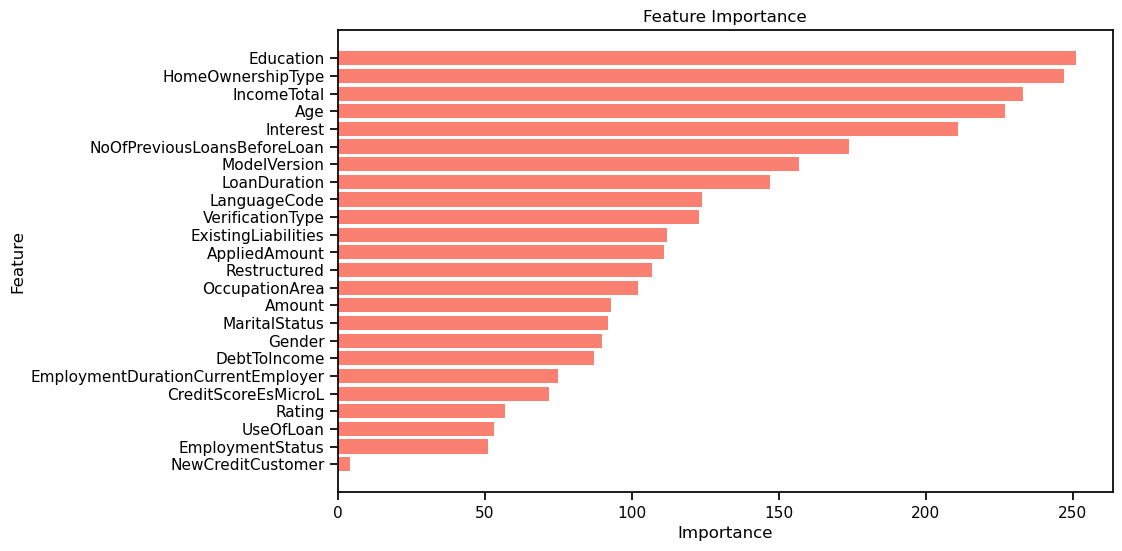

In [67]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='salmon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  #


In [68]:
#ADABoost
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8313297714455328
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      6792
           1       0.82      0.85      0.83      6684

    accuracy                           0.83     13476
   macro avg       0.83      0.83      0.83     13476
weighted avg       0.83      0.83      0.83     13476

Confusion Matrix:
[[5551 1241]
 [1032 5652]]


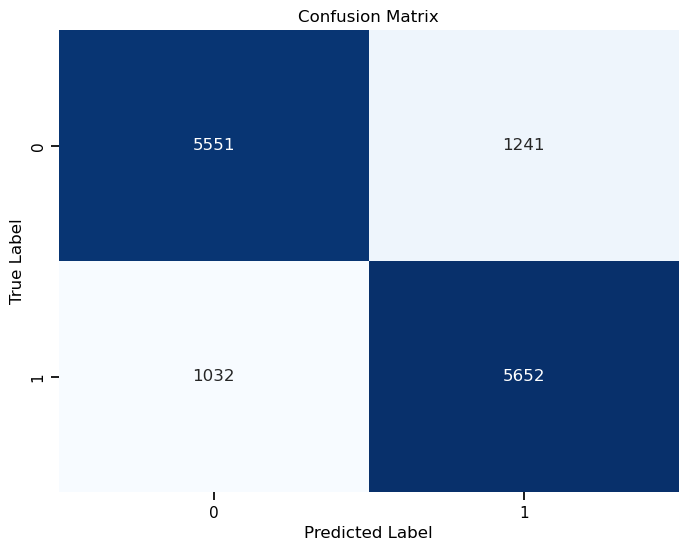

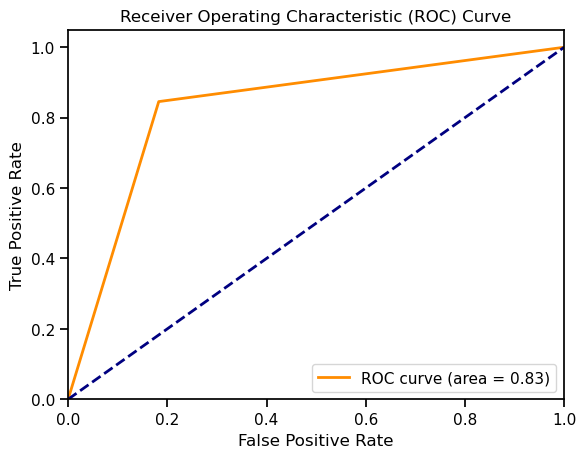

In [69]:
# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [70]:
# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)

MCC: 0.6630406454739374


In [71]:
# calculating Youdens Index aka Informedness

# Calculate True Positives, False Positives, True Negatives, and False Negatives
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

# Calculate Sensitivity and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate Youden's Index
youden_index = sensitivity + specificity - 1
print("Youden's Index:", youden_index)

Youden's Index: 0.6628864774906797


In [73]:
# Get feature importances from the trained AdaBoost model
feature_importance = model.feature_importances_

# Get the column names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importance for AdaBoost Model (Descending Order):")
print(feature_importance_df)

Feature Importance for AdaBoost Model (Descending Order):
                              Feature  Importance
10                          Education        0.27
3                    VerificationType        0.14
16                  HomeOwnershipType        0.11
9                        LanguageCode        0.10
4                              Gender        0.08
1                        LoanDuration        0.05
22        NoOfPreviousLoansBeforeLoan        0.04
11  EmploymentDurationCurrentEmployer        0.04
23                       ModelVersion        0.03
21                       Restructured        0.02
0                                 Age        0.02
7                              Amount        0.02
6                           UseOfLoan        0.02
5                            Interest        0.02
8                       AppliedAmount        0.01
14                   EmploymentStatus        0.01
17                CreditScoreEsMicroL        0.01
12                             Rating     

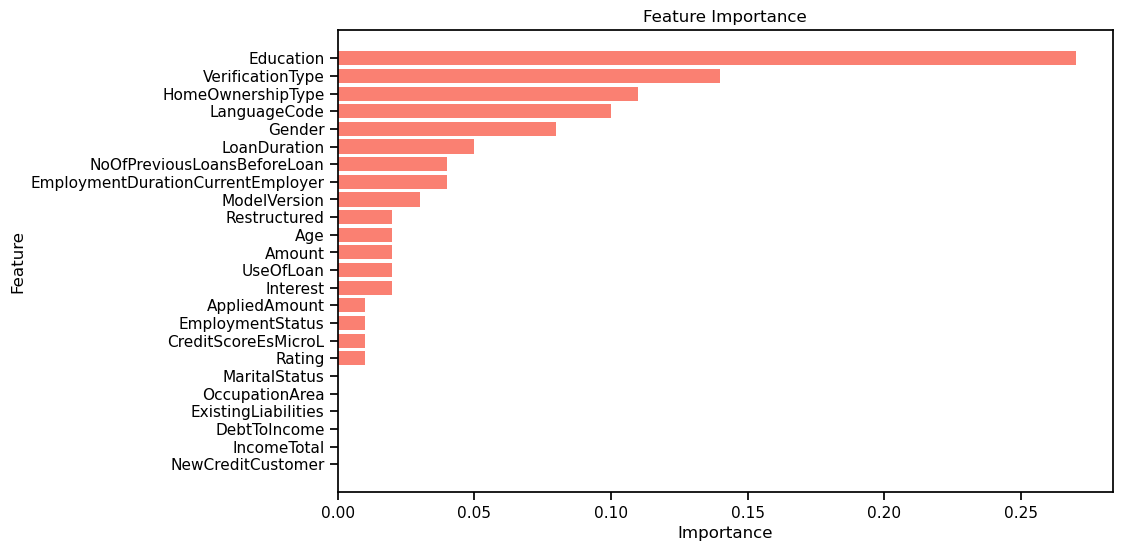

In [74]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='salmon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  #


In [75]:
#catboost

# Select features and target variable
X = final_df[features_to_keep]
y = final_df[target_variable]

# Train a model
catboost_classifier = CatBoostClassifier(random_state=42)
catboost_classifier.fit(X_train, y_train)

# Make predictions
y_pred = catboost_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

Learning rate set to 0.056536
0:	learn: 0.6645852	total: 799ms	remaining: 13m 17s
1:	learn: 0.6327441	total: 850ms	remaining: 7m 4s
2:	learn: 0.6070025	total: 870ms	remaining: 4m 49s
3:	learn: 0.5838565	total: 896ms	remaining: 3m 43s
4:	learn: 0.5666641	total: 918ms	remaining: 3m 2s
5:	learn: 0.5459310	total: 938ms	remaining: 2m 35s
6:	learn: 0.5294667	total: 965ms	remaining: 2m 16s
7:	learn: 0.5177238	total: 987ms	remaining: 2m 2s
8:	learn: 0.5046655	total: 1.01s	remaining: 1m 51s
9:	learn: 0.4887630	total: 1.05s	remaining: 1m 43s
10:	learn: 0.4791583	total: 1.07s	remaining: 1m 36s
11:	learn: 0.4695714	total: 1.1s	remaining: 1m 30s
12:	learn: 0.4624063	total: 1.12s	remaining: 1m 25s
13:	learn: 0.4537226	total: 1.15s	remaining: 1m 21s
14:	learn: 0.4446165	total: 1.19s	remaining: 1m 18s
15:	learn: 0.4365820	total: 1.22s	remaining: 1m 14s
16:	learn: 0.4299047	total: 1.25s	remaining: 1m 12s
17:	learn: 0.4214753	total: 1.28s	remaining: 1m 9s
18:	learn: 0.4182192	total: 1.32s	remaining: 1m 

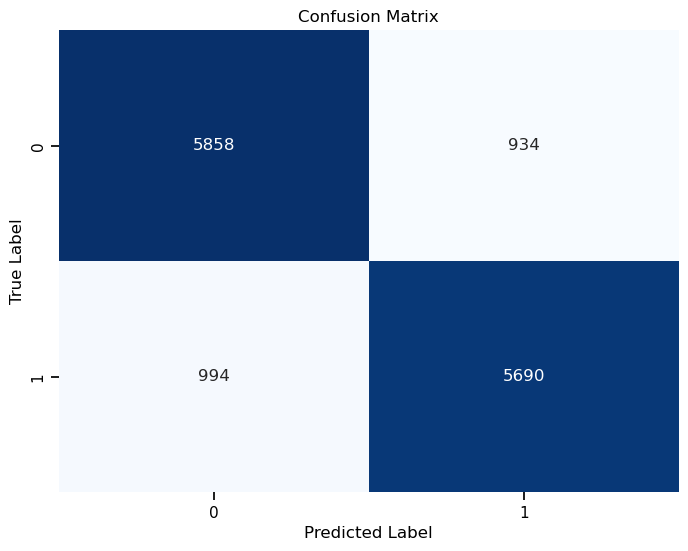

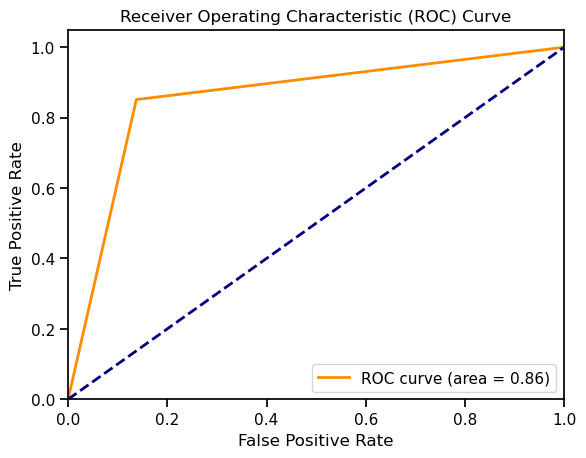

In [76]:
# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [77]:
# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC:", mcc)


MCC: 0.7138511867755969


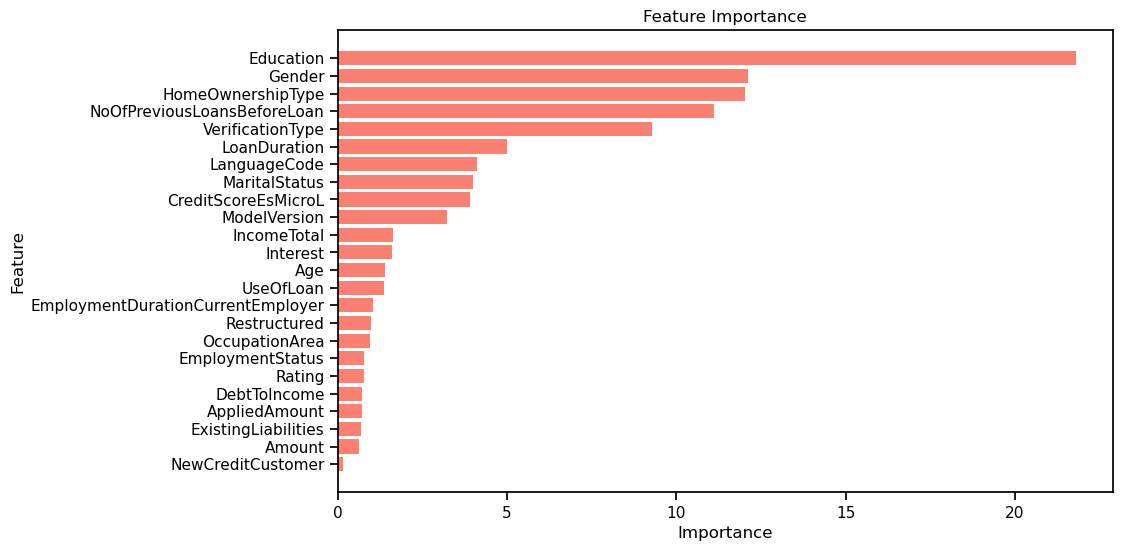

In [78]:
# Get feature importances from the trained model
feature_importance = catboost_classifier.get_feature_importance()

# Get the column names of the features
feature_names = X_train.columns

# Create a DataFrame to store feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='salmon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()


In [79]:
# Predict on the test set
y_pred = catboost_classifier.predict(X_test)

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)

print("Cohen's Kappa:", kappa)



Cohen's Kappa: 0.7138228764690551


In [80]:
joblib.dump(catboost_classifier,"catboost_model.pkl")

['catboost_model.pkl']